In [2]:
import mapomatic as mm
from qiskit import QuantumCircuit
from qiskit import transpile, schedule
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import pulse
from qiskit.pulse.library import Gaussian, GaussianSquare, Drag
from qiskit.providers.fake_provider import FakeKolkata
from qiskit.visualization import plot_histogram
from qiskit.circuit import Gate, Parameter
import numpy as np


In [1]:
from qiskit_ibm_provider import IBMProvider, least_busy

provider = IBMProvider(instance="q-info-hackathon/team-20/main")
backend = provider.backends()[0]
print(backend)

<IBMBackend('ibm_canberra')>


In [3]:
from qiskit_dynamics.backend import DynamicsBackend
backend= DynamicsBackend.from_backend(backend, subsystem_list=[0])

: 

: 

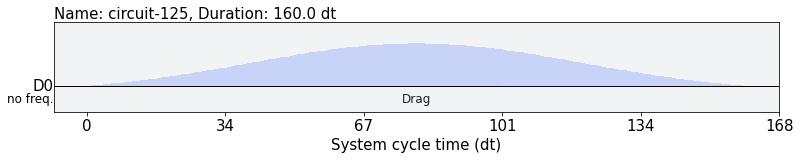

In [18]:
circ_sched.draw()

# X cal

In [51]:
f=[]
Xcal_list=[]
for i in range(100):
    X_cal=QuantumCircuit(1,1)
    X_cal.x(0)
    X_cal.measure(0,0)
    #X_cal.measure_all()
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=0.7171287840008055, amp=0.08+i*0.001, sigma=40), pulse.DriveChannel(0))
    X_cal.add_calibration('x',[0], x_q0)
    circ_transpile = transpile(X_cal, backend)
    Xcal_list.append(circ_transpile)
    # circ_sched=schedule(circ_transpile, backend)
    

In [ ]:
# job=backend.run(circ_sched,shots=1000)
for i in range(100):
    job=backend.run(Xcal_list,shots=1000)
    result=job.result()
    counts = result.get_counts(X_cal)
    f.append(counts["1"]/1000)

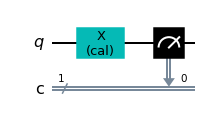

In [52]:
type(Xcal_list[0])
Xcal_list[0].draw('mpl')

In [38]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options, Session
from qiskit_ibm_provider import IBMProvider, least_busy

# Initialize service and backend
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='my_token', overwrite=True) #uncomment if you need to save your account again
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='q-info-hackathon/team-20/main',
)


c:\Users\kimje\anaconda3\envs\qiskit_JW\lib\site-packages\pkg_resources\__init__.py:122: PkgResourcesDeprecationWarning: skit-terra is an invalid version and will not be supported in a future release
  warnings.warn(


In [39]:
from qiskit_ibm_runtime import Session, Sampler
options = Options()

### Play with these options
options.execution.shots = 1000
options.optimization_level = 1  # No optimization/DD
options.resilience_level = 0  # No mitigation

In [53]:
backend = "ibm_canberra"

with Session(backend=backend, service=service):
    sampler = Sampler(options=options)
    result=sampler.run(Xcal_list[0]).result()

In [44]:
!pip list

Package                       Version


----------------------------- -----------
absl-py                       1.3.0
alabaster                     0.7.12
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asteval                       0.9.27
asttokens                     2.0.5
astunparse                    1.6.3
attrs                         19.3.0
azure-core                    1.25.1
azure-identity                1.11.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
black                         22.8.0
bleach                        5.0.0
broadbean                     0.11.0
cachetools                    5.2.0
certifi                       2022.5.18.1
cffi                          1.15.0
charset-normalizer            2.0.12
click                         8.1.3
colorama                      0.4.6
contextlib2                   21.6.0
cryptography                  37.0.2


In [ ]:
print(result)

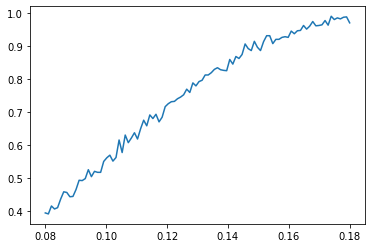

In [29]:
a=np.linspace(0.08,0.18,100)
plt.plot(a,f)
plt.show()

In [30]:
import numpy as np
from scipy.optimize import curve_fit
def _get_fitted_figure(xaxis, yaxis, init_guess, normalize=True):
        x = xaxis
        y = yaxis
        # normalization
        data = y
        if init_guess == None:
            init_guess = [0.5, np.pi, 0.5]
        else:
            init_guess = init_guess
        popt, pcov = curve_fit(_fitting_func, x, y, init_guess)
        #
        fig = plt.figure(figsize=(10, 7), dpi=400)
        fitted_y = _fitting_func(x, *popt)
        plt.plot(x, y, '--')
        plt.plot(x, fitted_y, 'o-', mfc='none')
        plt.grid()
        plt.show()
        print("Amp of peak:", x[np.argmax(fitted_y)])

def _fitting_func( x, amp, f, base):
    return amp * np.sin(f*x - np.pi/2) + base

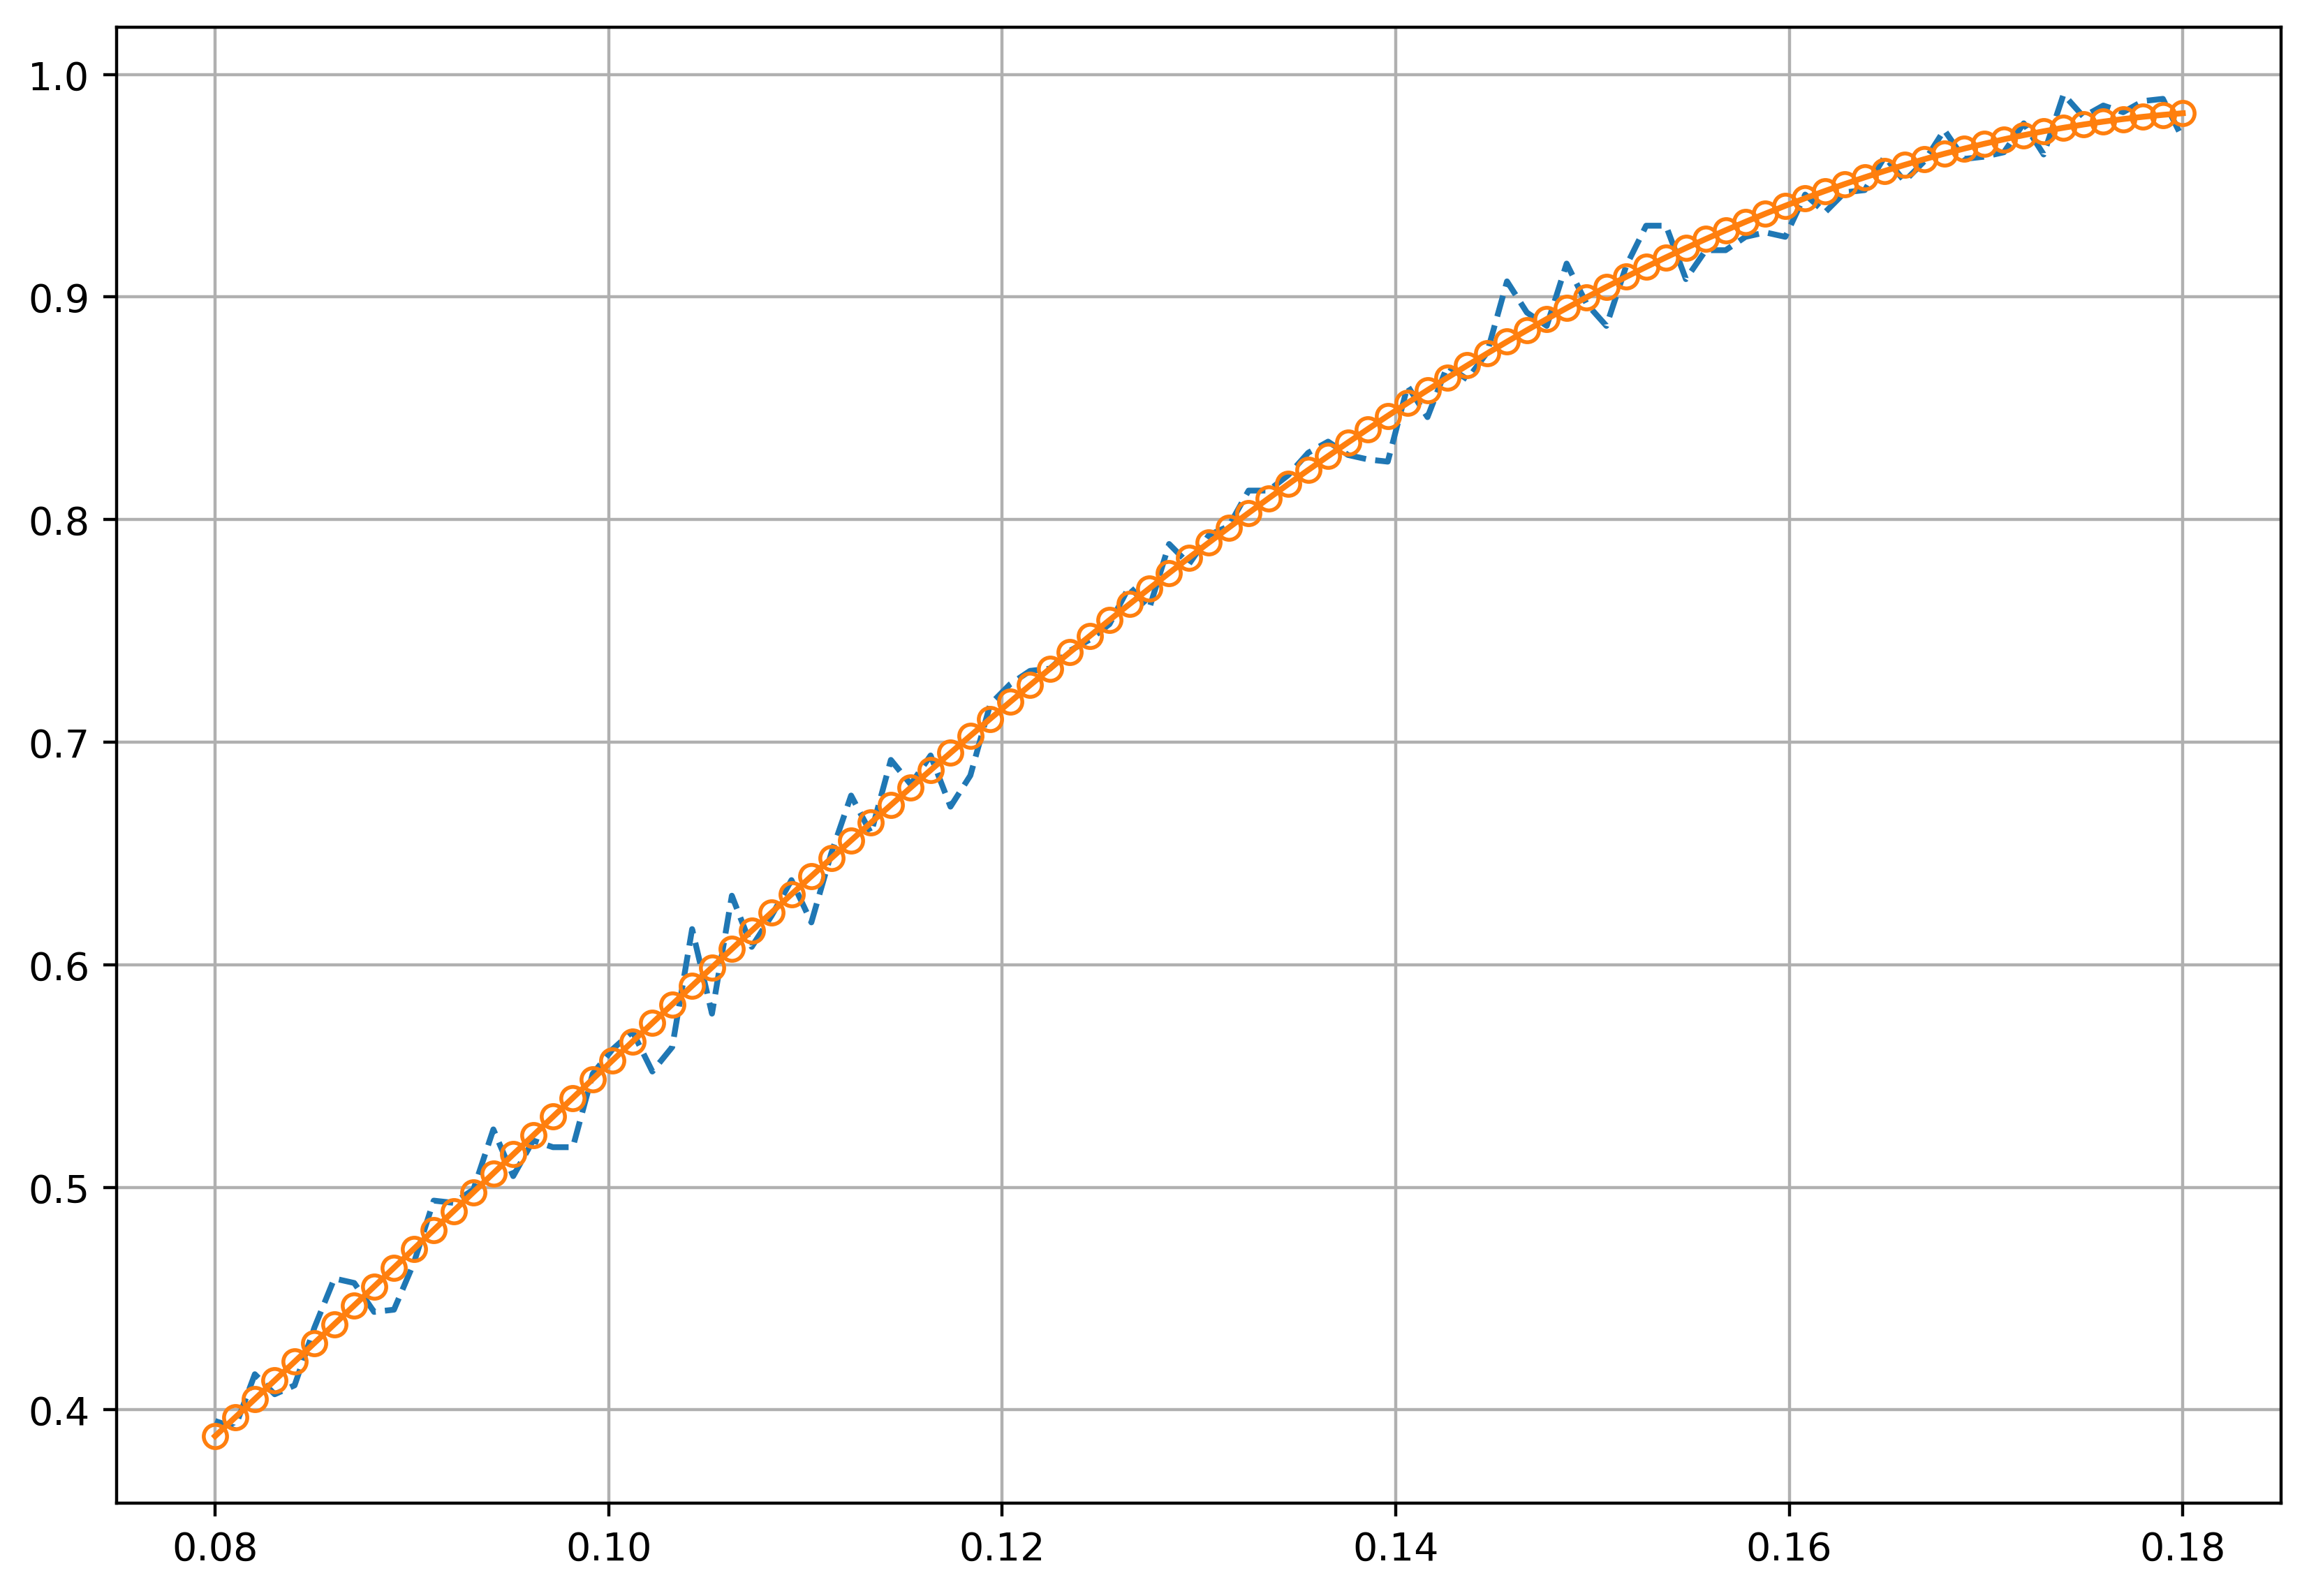

Amp of peak: 0.18


In [31]:
_get_fitted_figure(xaxis=a,yaxis=f,init_guess = None,normalize=True)

In [35]:
f=[]
for i in range(50):
    X_cal=QuantumCircuit(1,1)
    X_cal.x(0)
    X_cal.measure(0,0)
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=0.7171287840008055, amp=0.18, sigma=40), pulse.DriveChannel(0))
    X_cal.add_calibration('x',[0], x_q0)
    circ_transpile = transpile(X_cal, backend)
    job=backend.run(circ_transpile,shots=1000)
    result=job.result()
    counts = result.get_counts(X_cal)
    f.append(counts["1"]/1000)

KeyboardInterrupt: 

In [33]:
np.mean(f)

c:\Users\kimje\anaconda3\envs\qiskit_JW\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kimje\anaconda3\envs\qiskit_JW\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [18]:
d=[]
for i in range(100):
    X_cal=QuantumCircuit(1,1)
    X_cal.x(0)
    X_cal.measure(0,1)
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=-3+i*0.02, amp=0.15575757575757576, sigma=40), pulse.DriveChannel(0))
    X_cal.add_calibration('x',[0], x_q0)
    circ_transpile = transpile(X_cal, backend)
    job=backend.run(circ_transpile,shots=10000)
    result=job.result()
    counts = result.get_counts(X_cal)
    d.append(counts["1"]/10000)

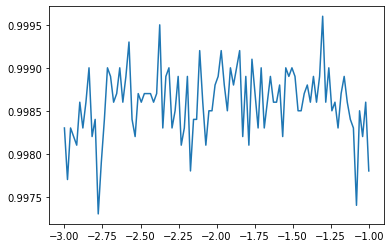

In [19]:
a=np.linspace(-3,-1,100)
plt.plot(a,d)
plt.show()

In [20]:
d=[]
for i in range(50):
    X_cal=QuantumCircuit(1,1)
    X_cal.x(0)
    X_cal.measure(0,0)
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=-1.5, amp=0.15575757575757576, sigma=40), pulse.DriveChannel(0))
    X_cal.add_calibration('x',[0], x_q0)
    circ_transpile = transpile(X_cal, backend)
    job=backend.run(circ_transpile,shots=20000)
    result=job.result()
    counts = result.get_counts(X_cal)
    d.append(counts["1"]/20000)

In [418]:
np.mean(d)

0.999995

# 원본 펄스 확인

In [ ]:
backend_a=FakeKolkata()

In [ ]:
circ=QuantumCircuit(1)
circ.x(0)
transpiled_circ=transpile(circ,backend_a)
schedule_circ=schedule(transpiled_circ,backend_a)
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, Play(Drag(duration=160, sigma=40, beta=0.7171287840008055, amp=0.1797336637124058, angle=0.0, name='Xp_d0'), DriveChannel(0), name='Xp_d0')), name="circuit-15966")

In [ ]:
f_a=[]
for i in range(50):
    circ=QuantumCircuit(1)
    circ.x(0)
    circ.measure_all()
    job_a=backend_a.run(circ,shots=20000)
    result_a=job_a.result()
    counts_a = result_a.get_counts(circ)
    f_a.append(counts_a["1"]/20000)


In [ ]:
np.mean(f_a)

0.9911230000000001